In [1]:
import pandas as pd
import duckdb


def load_results(res_list):
    df_list = []
    for f in res_list:
        df = pd.read_csv(f)
        df_list.append(df)
        # drop_first_row = df.iloc[1:]
        # df_list.append(drop_first_row)
    df = pd.concat(df_list)

    sql = """
        SELECT 
            ((max(qid)+1)/3)::integer as qid, 
            spatial_resolution, 
            temporal_resolution, 
            time_span, 
            area_persent, 
            category, 
            avg(execution_time) as avg_execution_time
        FROM df
        GROUP BY spatial_resolution, temporal_resolution, time_span, area_persent, category
        ORDER BY max(qid)
        """
    df_avg = duckdb.query(sql).to_df()
    return df_avg

In [2]:
import glob
result_list = glob.glob("proposed_get_raster_test_025H_result_*.csv")
df_proposed = load_results(result_list)
df_proposed

vanilla_list = glob.glob("vanilla_get_raster_test_025H_result_*.csv")
df_vanilla = load_results(vanilla_list)
df_vanilla

,qid,spatial_resolution,temporal_resolution,time_span,area_persent,category,avg_execution_time
0,1,0.25,hour,5.0,1,changing_area,34.136825
1,2,0.25,hour,5.0,25,changing_area,57.430116
2,3,0.25,hour,5.0,50,changing_area,90.791824
3,4,0.25,hour,5.0,100,changing_area,62.874853
4,5,0.25,hour,1.0,100,changing_time,20.923863
5,6,0.25,hour,2.5,100,changing_time,33.664710
6,7,0.25,hour,5.0,100,changing_time,79.510536
7,8,0.25,hour,10.0,100,changing_time,202.512724
8,9,0.25,hour,5.0,100,changing_spatial_res,87.711916
9,10,0.50,hour,5.0,100,changing_spatial_res,80.108558


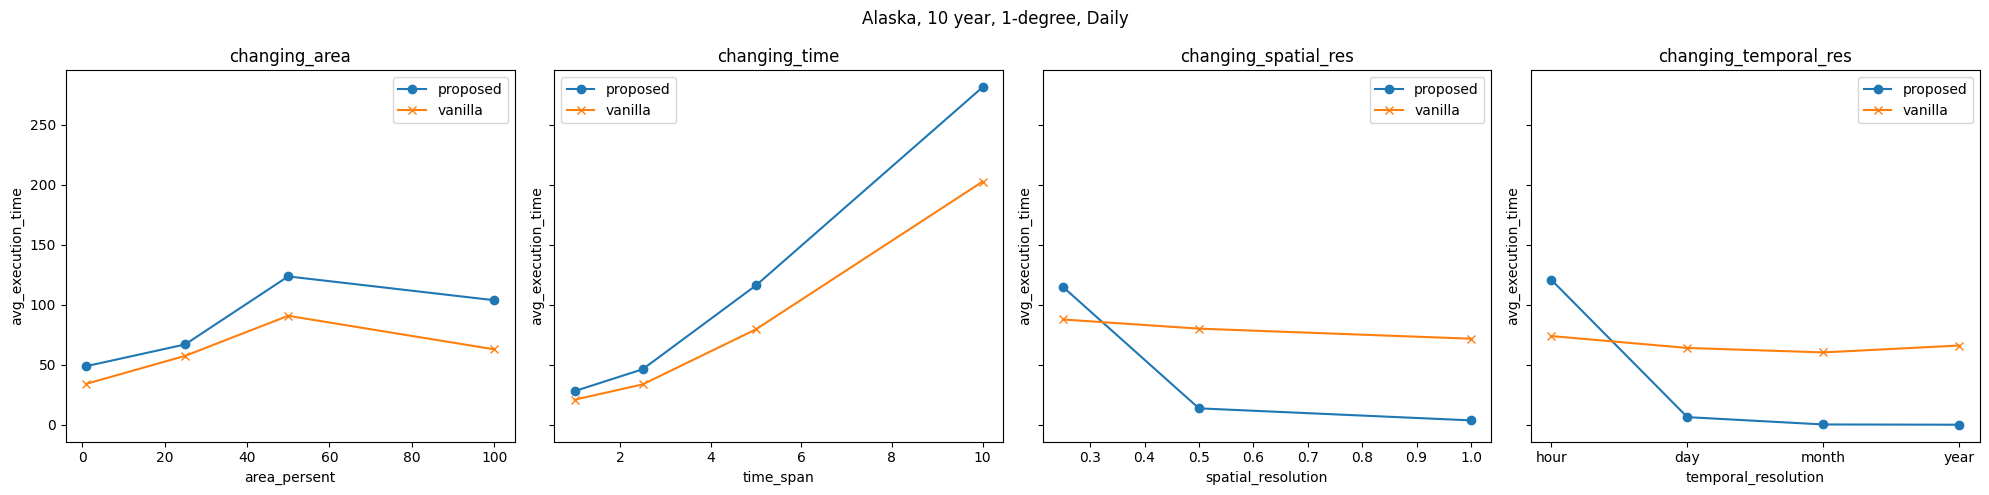

In [3]:
import matplotlib.pyplot as plt

# subplot (1, 4)
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# axs[0]: changing_area, x axis is area_persent and y axis is avg_execution_time
df_changing_area = df_proposed[df_proposed["category"] == "changing_area"]
axs[0].plot(df_changing_area["area_persent"], df_changing_area["avg_execution_time"], label="proposed", marker="o")
df_vanilla_changing_area = df_vanilla[df_vanilla["category"] == "changing_area"]
axs[0].plot(df_vanilla_changing_area["area_persent"], df_vanilla_changing_area["avg_execution_time"], label="vanilla", marker="x")
axs[0].set_title("changing_area")
axs[0].set_xlabel("area_persent")
axs[0].set_ylabel("avg_execution_time")
axs[0].legend()

# axs[1]: changing_time, x axis is time_span and y axis is avg_execution_time
df_changing_time = df_proposed[df_proposed["category"] == "changing_time"]
axs[1].plot(df_changing_time["time_span"], df_changing_time["avg_execution_time"], label="proposed", marker="o")
df_vanilla_changing_time = df_vanilla[df_vanilla["category"] == "changing_time"]
axs[1].plot(df_vanilla_changing_time["time_span"], df_vanilla_changing_time["avg_execution_time"], label="vanilla", marker="x")
axs[1].set_title("changing_time")
axs[1].set_xlabel("time_span")
axs[1].set_ylabel("avg_execution_time")
axs[1].legend()

# axs[2]: changing_spatial_res, x axis is spatial_resolution and y axis is avg_execution_time
df_changing_spatial_res = df_proposed[df_proposed["category"] == "changing_spatial_res"]
axs[2].plot(df_changing_spatial_res["spatial_resolution"], df_changing_spatial_res["avg_execution_time"], label="proposed", marker="o")
df_vanilla_changing_spatial_res = df_vanilla[df_vanilla["category"] == "changing_spatial_res"]
axs[2].plot(df_vanilla_changing_spatial_res["spatial_resolution"], df_vanilla_changing_spatial_res["avg_execution_time"], label="vanilla", marker="x")
axs[2].set_title("changing_spatial_res")
axs[2].set_xlabel("spatial_resolution")
axs[2].set_ylabel("avg_execution_time")
axs[2].legend()

# axs[3]: changing_temporal_res, x axis is temporal_resolution and y axis is avg_execution_time
df_changing_temporal_res = df_proposed[df_proposed["category"] == "changing_temporal_res"]
axs[3].plot(df_changing_temporal_res["temporal_resolution"], df_changing_temporal_res["avg_execution_time"], label="proposed", marker="o")
df_vanilla_changing_temporal_res = df_vanilla[df_vanilla["category"] == "changing_temporal_res"]
axs[3].plot(df_vanilla_changing_temporal_res["temporal_resolution"], df_vanilla_changing_temporal_res["avg_execution_time"], label="vanilla", marker="x")
axs[3].set_title("changing_temporal_res")
axs[3].set_xlabel("temporal_resolution")
axs[3].set_ylabel("avg_execution_time")
axs[3].legend()

# add fig title
fig.suptitle("Alaska, 10 year, 1-degree, Daily")

fig.tight_layout()
plt.show()